In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from ipynb.fs.full.util import get_df_splits
from ipynb.fs.full.util import get_feature_importances
from ipynb.fs.full.util import run_classifier_cv
from ipynb.fs.full.util import to_X_y
from ipynb.fs.full.util import to_X_y_tt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("../data/dataset_cleaned.csv", na_values=["_NULL_"], keep_default_na=False)

In [3]:
df = df[
    df["level_1"].notna()
    & (df["level_1"] != "*not in hierarchy")
    & (df["level_1"] != "*not in scope")
]

display(df.shape)

(38370, 14)

In [4]:
df_splits = get_df_splits(df)

X_y_splits = []
for df_train, df_test in df_splits:
    vectorizer = CountVectorizer(ngram_range=(1, 1))
    X_train, X_test, y_train, y_test, _ = to_X_y_tt(vectorizer, df_train, df_test, "level_1")
    
    X_y_splits.append((X_train, X_test, y_train, y_test, df_test))

In [5]:
classes = sorted(df["level_1"].unique().tolist())
classes

['*not found',
 'bordetella',
 'campylobacter',
 'chlamydia',
 'clostridium',
 'coronavirus',
 'corynebacterium',
 'escherichia',
 'haemophilus',
 'hepatitis c virus',
 'herpesvirus',
 'hiv',
 'human bocavirus',
 'human metapneumovirus',
 'influzena',
 'listeria',
 'neisseria',
 'parainfluenza or adenovirus',
 'respiratory syncytial virus',
 'rhinovirus or enterovirus',
 'salmonella',
 'shigella',
 'streptococcus',
 'treponema',
 'trichomonas',
 'vibrio',
 'yersinia']

In [6]:
classifier_factories = [
    MultinomialNB,
    lambda: LogisticRegression(solver="lbfgs", max_iter=1000, multi_class="auto"),
    lambda: RandomForestClassifier(n_estimators=100, random_state=1731),
    lambda: LinearSVC(random_state=1731, max_iter=10000)
]

accuracies = []
precisions = []
recalls = []
for index, classifier_factory in enumerate(classifier_factories):
    accuracy, confusion, precision, recall, error = run_classifier_cv(classifier_factory, X_y_splits, classes)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    display(f"Classifier {index + 1}")
    display(accuracy)
    display(precision)
    display(recall)

ipynb.fs.full.util:86: RuntimeWarning: invalid value encountered in true_divide
ipynb.fs.full.util:86: RuntimeWarning: invalid value encountered in true_divide
ipynb.fs.full.util:86: RuntimeWarning: invalid value encountered in true_divide
ipynb.fs.full.util:86: RuntimeWarning: invalid value encountered in true_divide
ipynb.fs.full.util:86: RuntimeWarning: invalid value encountered in true_divide


'Classifier 1'

0.9151941621058117

array([0.97680874, 0.67132867, 0.89595376, 0.5504886 , 0.77813505,
       1.        , 0.79234973, 0.80557444, 0.97716895, 0.99521588,
       0.44206774, 0.99108979, 0.        , 1.        , 0.53742802,
       1.        , 0.8671875 , 0.33333333, 1.        , 0.31014493,
       0.92503748, 0.95535714, 0.97469297, 0.55172414, 0.39759036,
       1.        , 0.64864865])

array([0.92023537, 0.96644295, 0.86111111, 0.69262295, 0.96031746,
       0.05208333, 0.9602649 , 0.95180723, 0.95535714, 0.97298877,
       0.92193309, 0.97901151, 0.        , 0.00925926, 0.70351759,
       0.66176471, 0.86549708, 0.21875   , 0.02531646, 0.91845494,
       0.98878205, 0.79259259, 0.98979592, 0.35555556, 0.86842105,
       0.49333333, 0.93103448])

'Classifier 2'

0.980557727391191

array([0.99277645, 0.97658863, 0.98055556, 0.94936709, 0.99203187,
       0.6284153 , 1.        , 0.98791297, 0.9955157 , 0.99859501,
       0.98867925, 0.99864499, 0.525     , 0.61607143, 0.89002558,
       1.        , 0.98425197, 0.75949367, 0.7260274 , 0.64937759,
       0.98883573, 0.98496241, 0.99811107, 0.95348837, 0.91666667,
       1.        , 0.99565217])

array([0.9959137 , 0.97986577, 0.98055556, 0.92213115, 0.98809524,
       0.59895833, 1.        , 0.98473896, 0.99107143, 0.99731057,
       0.9739777 , 0.99796886, 0.62222222, 0.63888889, 0.87437186,
       0.98529412, 0.97465887, 0.68181818, 0.67088608, 0.67167382,
       0.99358974, 0.97037037, 0.99848828, 0.91111111, 0.86842105,
       0.97333333, 0.98706897])

'Classifier 3'

0.9731039874902268

array([0.98505127, 0.94827586, 0.95702006, 0.92056075, 0.94186047,
       0.64361702, 0.97297297, 0.96981732, 0.9954955 , 0.99871119,
       1.        , 1.        , 0.45578231, 0.57446809, 0.87601078,
       0.98360656, 0.98155738, 0.68902439, 0.65648855, 0.616     ,
       0.97476341, 0.98062016, 0.99697657, 0.81395349, 0.91176471,
       1.        , 0.99543379])

array([0.99449711, 0.92281879, 0.92777778, 0.80737705, 0.96428571,
       0.63020833, 0.95364238, 0.98072289, 0.98660714, 0.99672591,
       0.94423792, 0.99187542, 0.4962963 , 0.5       , 0.81658291,
       0.88235294, 0.9337232 , 0.64204545, 0.5443038 , 0.66094421,
       0.99038462, 0.93703704, 0.99697657, 0.77777778, 0.81578947,
       0.93333333, 0.93965517])

C:\Users\william.lu\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'Classifier 4'

0.9817565806619755

array([0.9945046 , 0.9669967 , 0.98603352, 0.94238683, 0.98804781,
       0.64088398, 1.        , 0.98797113, 0.99107143, 0.99906345,
       0.9962406 , 0.99864773, 0.49689441, 0.64566929, 0.87317073,
       1.        , 0.98235294, 0.75226586, 0.74468085, 0.67477876,
       0.99518459, 0.98863636, 0.99811178, 0.93478261, 0.91891892,
       0.98648649, 0.99568966])

array([0.99585921, 0.98322148, 0.98055556, 0.93852459, 0.98412698,
       0.60416667, 1.        , 0.98955823, 0.99107143, 0.99789523,
       0.98513011, 1.        , 0.59259259, 0.75925926, 0.89949749,
       0.98529412, 0.97660819, 0.70738636, 0.66455696, 0.65450644,
       0.99358974, 0.96666667, 0.99886621, 0.95555556, 0.89473684,
       0.97333333, 0.99568966])

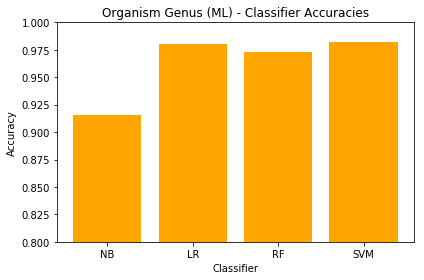

In [7]:
X = ["NB", "LR", "RF", "SVM"]
n = len(X)

plt.bar(range(n), accuracies, align="center", color="orange")

plt.xticks(range(n), X)
plt.ylim(0.8, 1)

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Organism Genus (ML) - Classifier Accuracies")

plt.tight_layout()
plt.savefig("../figs/ogml_accuracies.png")

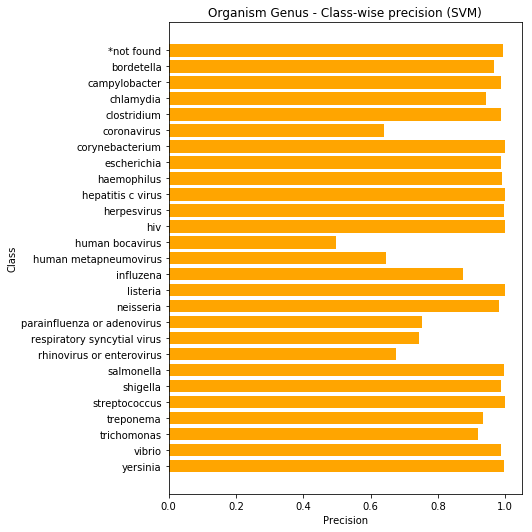

In [8]:
plt.figure(figsize=(7.5, 7.5))

y = [-x for x in range(len(classes))]
width = precisions[3]

plt.barh(y, width, color="orange")

plt.yticks(y, classes)

plt.xlabel("Precision")
plt.ylabel("Class")
plt.title("Organism Genus - Class-wise precision (SVM)")

plt.tight_layout()
plt.savefig("../figs/ogml_svm_precision.png")

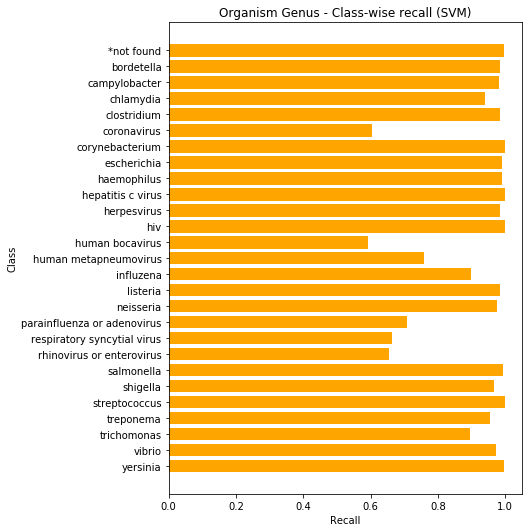

In [9]:
plt.figure(figsize=(7.5, 7.5))

y = [-x for x in range(len(classes))]
width = recalls[3]

plt.barh(y, width, color="orange")

plt.yticks(y, classes)

plt.xlabel("Recall")
plt.ylabel("Class")
plt.title("Organism Genus - Class-wise recall (SVM)")

plt.tight_layout()
plt.savefig("../figs/ogml_svm_recall.png")

In [10]:
vectorizer = CountVectorizer(ngram_range=(1, 1))
X, y, feature_names = to_X_y(vectorizer, df, "level_1")

classifier = RandomForestClassifier(n_estimators=100, random_state=1731)
classifier.fit(X, y)

feature_importances = get_feature_importances(classifier, feature_names)

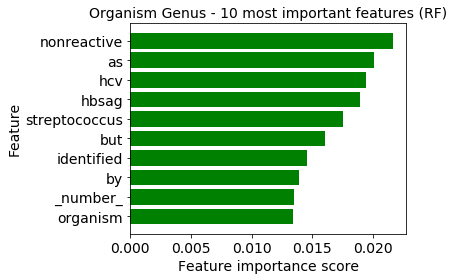

In [11]:
y = [-x for x in range(len(feature_importances))]
width = [x[1] for x in feature_importances]

plt.barh(y, width, color="green")

feature_names = [x[0] for x in feature_importances]
plt.xticks(fontsize=14)
plt.yticks(y, feature_names, fontsize=14)

plt.xlabel("Feature importance score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Organism Genus - 10 most important features (RF)", fontsize=14)

plt.tight_layout()
plt.savefig("../figs/ogml_rf_features.png")

In [12]:
df_curr = df[
    (df["level_1"] != "*not found")
]
display(df_curr.shape)

vectorizer = CountVectorizer(ngram_range=(1, 1))
X, y, feature_names = to_X_y(vectorizer, df_curr, "level_1")

classifier = RandomForestClassifier(n_estimators=100, random_state=1731)
classifier.fit(X, y)

feature_importances = get_feature_importances(classifier, feature_names)

(20016, 14)

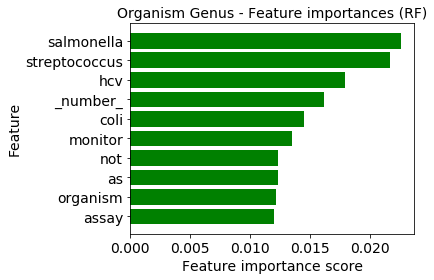

In [13]:
y = [-x for x in range(len(feature_importances))]
width = [x[1] for x in feature_importances]

plt.barh(y, width, color="green")

feature_names = [x[0] for x in feature_importances]
plt.xticks(fontsize=14)
plt.yticks(y, feature_names, fontsize=14)

plt.xlabel("Feature importance score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Organism Genus - Feature importances (RF)", fontsize=14)

plt.tight_layout()
plt.savefig("../figs/ogml_rf_alt_features.png")